# Extract data at the intersection of a horizon and 3D volume

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

%matplotlib inline

from segysak.segy import (
    segy_loader,
    get_segy_texthead,
    segy_header_scan,
    segy_header_scrape,
)

from os import path

## Load Small 3D Volume from Volve

In [3]:
volve_3d_path = path.join("data", "volve10r12-full-twt-sub3d.sgy")
print("3D", volve_3d_path, path.exists(volve_3d_path))

3D data/volve10r12-full-twt-sub3d.sgy True


In [4]:
get_segy_texthead(volve_3d_path)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
ÝCroC 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [5]:
from segysak.segy import well_known_byte_locs

volve_3d = segy_loader(volve_3d_path, **well_known_byte_locs("petrel_3d"))
volve_3d.data

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

100%|██████████| 12.3k/12.3k [00:00<00:00, 21.0k traces/s]

100%|██████████| 12.3k/12.3k [00:00<00:00, 21.0k traces/s]

Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Converting SEGY:   4%|▍         | 473/12.3k [00:00<00:02, 4.72k traces/s]

Converting SEGY:   8%|▊         | 994/12.3k [00:00<00:02, 5.01k traces/s]

Converting SEGY:  12%|█▏        | 1.53k/12.3k [00:00<00:02, 5.14k traces/s]

Converting SEGY:  17%|█▋        | 2.06k/12.3k [00:00<00:01, 5.22k traces/s]

Converting SEGY:  21%|██        | 2.59k/12.3k [00:00<00:01, 5.25k traces/s]

Converting SEGY:  25%|██▌       | 3.12k/12.3k [00:00<00:01, 5.27k traces/s]

Converting SEGY:  30%|██▉       | 3.66k/12.3k [00:00<00:01, 5.30k traces/s]

Converting SEGY:  34%|███▍      | 4.19k/12.3k [00:00<00:01, 5.30k traces/s]

Converting SEGY:  38%|███▊      | 4.72k/12.3k [00:00<00:01, 5.29k traces/s]

Converting SEGY:  43%|████▎     | 5.26k/12.3k [00:01<00:01, 5.31k traces/s]

Converting SEGY:  47%|████▋     | 5.79k/12.3k [00:01<00:01, 5.32k traces/s]

Converting SEGY:  51%|█████▏    | 6.33k/12.3k [00:01<00:01, 5.33k traces/s]

Converting SEGY:  56%|█████▌    | 6.86k/12.3k [00:01<00:01, 5.31k traces/s]

Converting SEGY:  60%|█████▉    | 7.39k/12.3k [00:01<00:00, 5.32k traces/s]

Converting SEGY:  64%|██████▍   | 7.92k/12.3k [00:01<00:00, 5.32k traces/s]

Converting SEGY:  69%|██████▊   | 8.46k/12.3k [00:01<00:00, 5.31k traces/s]

Converting SEGY:  73%|███████▎  | 8.99k/12.3k [00:01<00:00, 5.32k traces/s]

Converting SEGY:  77%|███████▋  | 9.52k/12.3k [00:01<00:00, 5.31k traces/s]

Converting SEGY:  82%|████████▏ | 10.1k/12.3k [00:01<00:00, 5.32k traces/s]

Converting SEGY:  86%|████████▌ | 10.6k/12.3k [00:02<00:00, 4.53k traces/s]

Converting SEGY:  90%|█████████ | 11.1k/12.3k [00:02<00:00, 4.72k traces/s]

Converting SEGY:  95%|█████████▍| 11.6k/12.3k [00:02<00:00, 4.89k traces/s]

Converting SEGY:  99%|█████████▉| 12.2k/12.3k [00:02<00:00, 5.01k traces/s]

Converting SEGY: 100%|██████████| 12.3k/12.3k [00:02<00:00, 5.15k traces/s]

<xarray.DataArray 'data' (iline: 61, xline: 202, twt: 850)> Size: 42MB
array([[[ 2.05745399e-02,  2.20407024e-02,  1.96589418e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.23256370e-02,  1.59417503e-02,  1.38800517e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.63372169e-05,  4.92771342e-03,  3.24293785e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 5.47898412e-02,  5.22681139e-02,  5.00054434e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.27492070e-02,  6.00568764e-02,  5.75365834e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.91987872e-02,  6.67222738e-02,  6.40410781e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-3.46487835e-02, -3.38801444e-02, -3.20093483e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-4.10056897e-02, -4.02579159e-02, -3.83855253e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.01492284e-02, -4.94211540e-02, -4.75146063e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-8.89039040e-03, -9.03325155e-03, -8.77474993e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-8.80905986e-03, -9.18869302e-03, -8.81006569e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 2.17335932e-02,  1.93170868e-02,  2.07530260e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.12477669e-02,  1.89855732e-02,  2.04903930e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.13435888e-02,  1.91475898e-02,  2.07546689e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 6.19068742e-03,  5.15908375e-03,  6.23933598e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.53349811e-03,  6.49160147e-03,  7.51641765e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 9.05360654e-03,  7.92511553e-03,  8.82008299e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * iline    (iline) uint16 122B 10090 10091 10092 10093 ... 10148 10149 10150
  * xline    (xline) uint16 404B 2150 2151 2152 2153 ... 2348 2349 2350 2351
  * twt      (twt) float64 7kB 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 49kB 4.364e+05 4.364e+05 ... 4.341e+05
    cdp_y    (iline, xline) float32 49kB 6.477e+06 6.477e+06 ... 6.479e+06

## Load up horizon data

In [6]:
top_hugin_path = path.join("data", "hor_twt_hugin_fm_top.dat")
print("Top Hugin", top_hugin_path, path.exists(top_hugin_path))

Top Hugin data/hor_twt_hugin_fm_top.dat True


In [7]:
import pandas as pd

top_hugin_df = pd.read_csv(top_hugin_path, names=["cdp_x", "cdp_y", "twt"], sep=" ")
top_hugin_df.head()

,cdp_x,cdp_y,twt
0,432186.713151,6.477029e+06,2776.275147
1,432189.737524,6.477041e+06,2779.657715
2,432192.761898,6.477053e+06,2780.465088
3,432195.786271,6.477066e+06,2780.949951
4,432198.810645,6.477078e+06,2781.769775


Would be good to plot a seismic (iline,xline) section in Pyvista as well

In [8]:
# import pyvista as pv

# point_cloud = pv.PolyData(-1*top_hugin_df.to_numpy(), cmap='viridis')
# point_cloud.plot(eye_dome_lighting=True)

Alternativey we can use the points to output a `xarray.Dataset` which comes with coordinates for plotting already gridded up for Pyvista.

In [9]:
top_hugin_ds = volve_3d.seis.surface_from_points(
    top_hugin_df, "twt", right=("cdp_x", "cdp_y")
)
top_hugin_ds

<xarray.Dataset> Size: 198kB
Dimensions:  (iline: 61, xline: 202)
Coordinates:
  * iline    (iline) uint16 122B 10090 10091 10092 10093 ... 10148 10149 10150
  * xline    (xline) uint16 404B 2150 2151 2152 2153 ... 2348 2349 2350 2351
    twt      (iline, xline) float64 99kB 2.741e+03 2.742e+03 ... 2.635e+03
    cdp_x    (iline, xline) float32 49kB 4.364e+05 4.364e+05 ... 4.341e+05
    cdp_y    (iline, xline) float32 49kB 6.477e+06 6.477e+06 ... 6.479e+06
Data variables:
    *empty*
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.595060190682801, -6.114936243337226, -1.50399996...
    coord_scalar:        -100.0

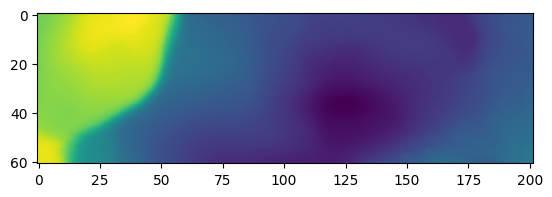

In [10]:
# the twt values from the points now in a form we can relate to the xarray cube.
plt.imshow(top_hugin_ds.twt)

In [11]:
# point_cloud = pv.StructuredGrid(
#     top_hugin_ds.cdp_x.values,
#     top_hugin_ds.cdp_y.values,top_hugin_ds.twt.values,
#     cmap='viridis')
# point_cloud.plot(eye_dome_lighting=True)

## Horizon Amplitude Extraction

Extracting horizon amplitudes requires us to interpolate the cube onto the 3D horizon.

In [12]:
top_hugin_amp = volve_3d.data.interp(
    {"iline": top_hugin_ds.iline, "xline": top_hugin_ds.xline, "twt": top_hugin_ds.twt}
)

<a list of 24 text.Text objects>

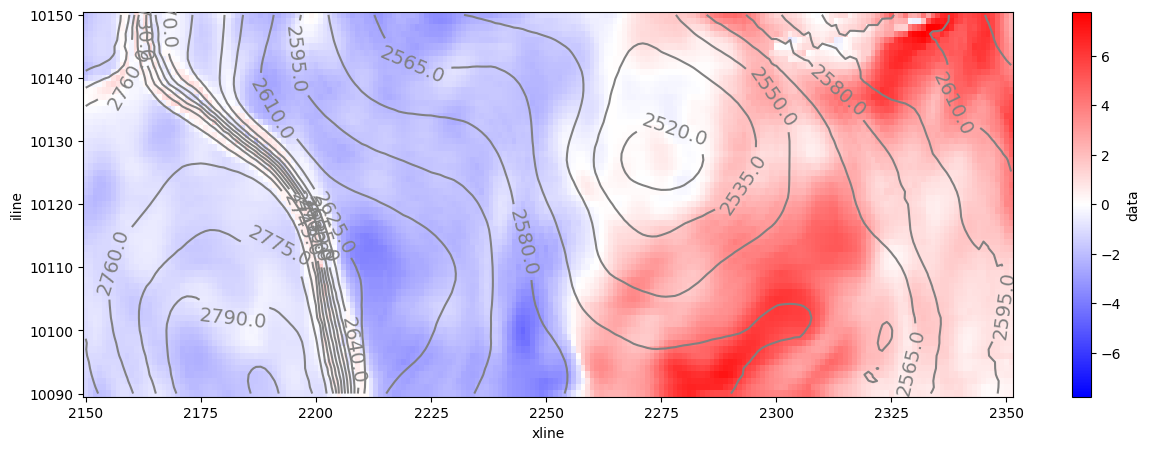

In [13]:
#
fig = plt.figure(figsize=(15, 5))
top_hugin_amp.plot(cmap="bwr")
cs = plt.contour(
    top_hugin_amp.xline, top_hugin_amp.iline, top_hugin_ds.twt, levels=20, colors="grey"
)
plt.clabel(cs, fontsize=14, fmt="%.1f")